<a href="https://colab.research.google.com/github/AnastasiiaVladimirovna/transcriptomics_homeworks/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Номер 1

In [ ]:
# Загрузка R magic
%load_ext rpy2.ipython

# Установка нужных пакетов
!Rscript -e 'install.packages("fitdistrplus", repos="https://cloud.r-project.org")'

# Загрузка датасета
!gdown --id 1nlpCcK6LoqEJnvCqEdcUFNElZSoz_3Kg

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Настройка отображения
plt.rcParams["figure.dpi"] = 100

In [ ]:
df = pd.read_csv("LUAD_counts.tsv", sep="\t")
df.index = [gene.split(".")[0] for gene in df.gene_name]
del df["gene_name"]
df = df.T

In [ ]:
df.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ACTL10,AC119733,AC020765,AC010980,AC004233,AL451106,AC008763,AC006486,AL391628,AP006621
sample_0,4275,0,1071,630,542,372,10445,6760,31744,2022,...,0,0,0,11,0,0,0,0,6,10
sample_1,1536,0,765,510,172,911,4290,1097,807,1043,...,0,0,0,15,1,0,1,0,6,9
sample_2,5009,13,2731,919,321,2299,9368,3812,2704,2496,...,0,0,0,36,2,0,0,0,15,18
sample_3,1889,0,1941,548,301,879,5994,2310,2552,1332,...,0,0,1,17,0,0,0,0,3,22
sample_4,1329,0,1395,297,320,387,6215,3142,685,1676,...,0,0,0,9,3,0,0,0,2,9


In [ ]:
df = df[df >0].dropna(1)
df = df.sample(n=30,axis='columns')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
%%R
library(fitdistrplus)

In [ ]:
%%R -i df
test <- function(dataset = df, a){    
	sapply(dataset, function(x) fitdist(x, a)$aic)   
}

ans = sapply(c("norm", "nbinom", "lnorm"), function(x) test(df, x))
df1<-as.data.frame(ans)

In [ ]:
%%R
library(tidyverse)


✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()



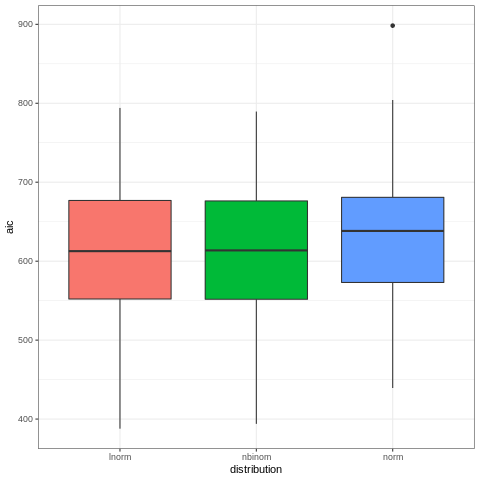

In [ ]:
%%R
df2 <- df1 %>%
  pivot_longer(cols = norm:lnorm, names_to = 'distribution', values_to = 'aic')
theme_set(theme_bw())
p1 <- ggplot(df2) +
  geom_boxplot(aes(x = distribution, y = aic, fill = distribution))+
  theme(legend.position = "none")
p1

Из получившегося графика видно, что нормальное распределение является наименее правдоподобным для наших данных, а разница между Log Normal и Negative Binomial очень незначительная, но lnorm обычно (для нескольких разных случайных наборов генов) лучше подходит 


На Пуасонна тоже проверяла, но там совсем огромное значение aic было, и из-за этого разницу между другими боксплотами видно не было


## Номер 2


Технические образцы это технические реплики одного образца, то есть одна и та же библиотека, залитая в разные дорожки. 
Биологические реплики это про образцы, полученные из разных организмов. 

In [ ]:
!gdown --id 1M8-86VecaYPERovPk4JKhT2lLa4PfJxi

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1M8-86VecaYPERovPk4JKhT2lLa4PfJxi
To: /content/GSE29022_gene_counts.txt
100% 2.76M/2.76M [00:00<00:00, 150MB/s]


In [ ]:
df = pd.read_table("GSE29022_gene_counts.txt", sep="\t")
# df = df.T

In [ ]:
col = []
for i in df.columns:
  col.append(i.split('.')[-1])
df.columns = col

In [ ]:
df1 = df.iloc[:, (df.columns == 'lane1') + (df.columns == 'lane2')]


In [ ]:
df1 = df1.T
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,17343,17344,17345,17346,17347,17348,17349,17350,17351,17352
lane1,794,466,3,80,19,0,6,1813,48,25,...,181,0,16,53,0,8,214,0,32,169
lane2,888,581,1,71,34,3,6,1962,64,23,...,219,0,26,59,0,16,205,0,18,162
lane1,1485,573,2,112,19,22,6,3240,68,16,...,213,0,21,35,2,16,212,0,38,363
lane2,1578,558,8,149,26,19,3,3380,49,15,...,271,0,33,36,0,11,200,0,27,436
lane1,1615,587,1,184,17,21,2,4251,81,9,...,465,0,22,43,0,16,329,1,64,453


In [ ]:
means = np.mean(df1.values, axis=0)
vars = np.var(df1.values, axis=0)

means = means[vars > 0]
vars = vars[vars > 0]

means = np.log10(means)
vars = np.log10(vars)

Text(0, 0.5, 'log$_{10}$(Variance)')

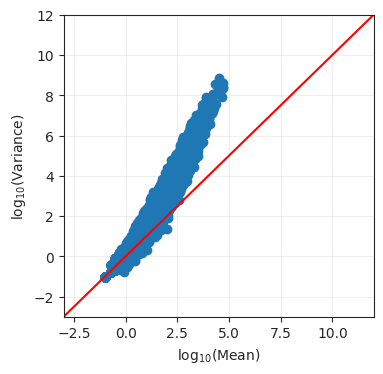

In [ ]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)

ax.scatter(means, vars)
ax.plot([-3, 12], [-3, 12], color="red")
ax.set_xlim(-3, 12)
ax.set_ylim(-3, 12)
ax.grid(alpha=0.3)

ax.set_xlabel("log$_{10}$(Mean)")
ax.set_ylabel("log$_{10}$(Variance)")

Как-то не сильно пуассон.. Ну только в начале самом

## Номер 3

In [ ]:
!gdown --id 1Mh2T7YyWG9LPQsuNGy_IdYhbbzUgZUek

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Mh2T7YyWG9LPQsuNGy_IdYhbbzUgZUek
To: /content/polyA_total_counts.tsv
100% 1.87M/1.87M [00:00<00:00, 115MB/s]


In [ ]:
df = pd.read_table("polyA_total_counts.tsv", sep='\t')
df.index = [gene.split(".")[0] for gene in df['Unnamed: 0']]
del df['Unnamed: 0']

In [ ]:
df1 = df.iloc[:, 0:4]

In [ ]:
df1 = df1.T
df1

,MAFIP,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,KIR3DL2,...,PRY,BPY2,DAZ1,DAZ2,CDY1B,BPY2B,DAZ3,DAZ4,BPY2C,CDY1
colon_polyA_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,148,0,0,0,0
colon_polyA_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
colon_polyA_1,0,0,0,0,0,0,0,0,0,0,...,0,26,0,0,0,0,0,0,63,0
colon_polyA_2,0,0,0,0,0,0,0,0,0,0,...,0,0,74,0,0,0,0,0,0,0


In [ ]:
means = np.mean(df1.values, axis=0)
vars = np.var(df1.values, axis=0)

means = means[vars > 0]
vars = vars[vars > 0]

means = np.log10(means)
vars = np.log10(vars)

Text(0, 0.5, 'log$_{10}$(Variance)')

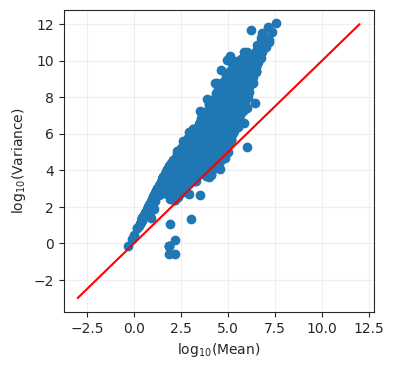

In [ ]:
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)

ax.scatter(means, vars)
ax.plot([-3, 12], [-3, 12], color="red")
ax.grid(alpha=0.3)

ax.set_xlabel("log$_{10}$(Mean)")
ax.set_ylabel("log$_{10}$(Variance)")

Это прям совсем не Пуассон